In [9]:
import pandas as pd
import ast 
import matplotlib.pyplot  as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()
df_da


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


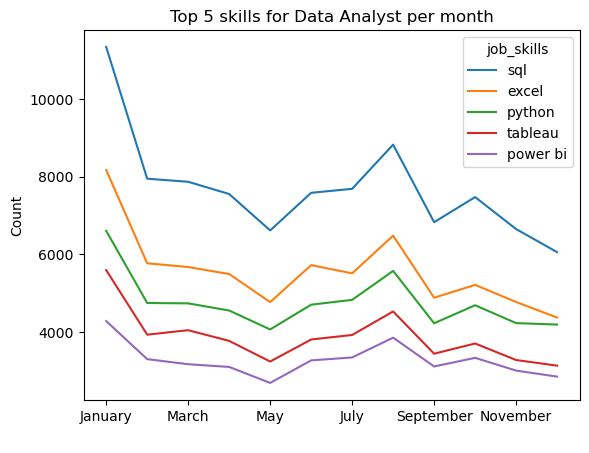

In [31]:
# create a new column for month number
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_da_explode = df_da.explode('job_skills')

df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sort the skills by count
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending = False).index]
df_da_pivot = df_da_pivot.drop('Total')

# sUse month names for plotting
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop(columns='job_posted_month_no')
df_da_pivot

# Fet the top 5 skills
df_da_pivot.iloc[: , :5].plot(kind='line')
plt.title("Top 5 skills for Data Analyst per month")

plt.ylabel('Count')
plt.xlabel(' ');
plt.show()


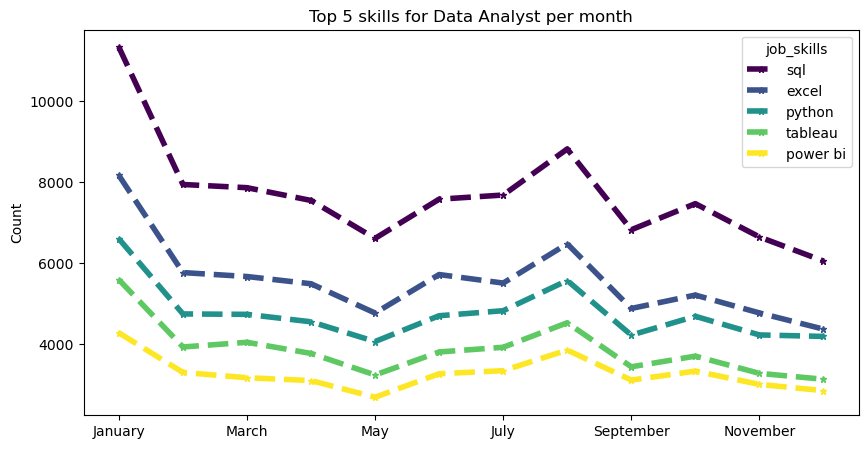

In [44]:
df_da_pivot.iloc[: , :5].plot(
    kind='line',
    linewidth=4,
    linestyle ='--', # options: '--' , ':'
    colormap ='viridis', # options: 'plasma' , 'inferno' , 'magma' , 'cividis'
    marker='*' ,# options: 'o' , '*' , '+' , '1' ....
    markersize = 5,
    figsize = (10,5)
)
plt.title("Top 5 skills for Data Analyst per month")

plt.ylabel('Count')
plt.xlabel(' ');
plt.show()

In [54]:
# Explode the job skills into individual rows
df_exploded = df_da.explode('job_skills')
df_exploded

# Calculate teh average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count = ('job_skills' , 'count')
)
skill_stats
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending = False).head(skill_count)
skill_stats


,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


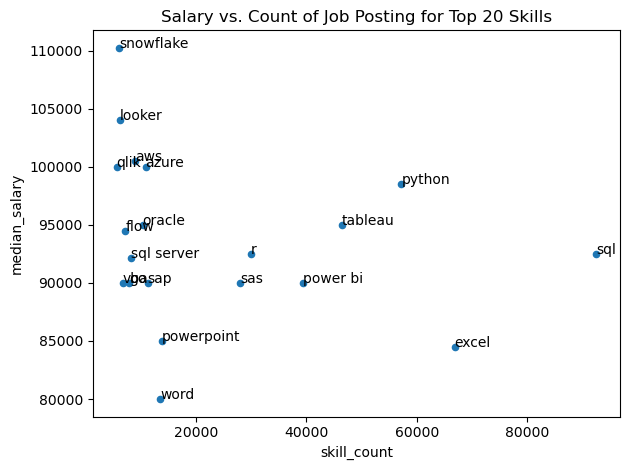

In [60]:
skill_stats.plot(kind='scatter' , x='skill_count' , y= 'median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i] , skill_stats['median_salary'].iloc[i] , txt)
#plt.text(20000,80000,'Kapil')

plt.title(f'Salary vs. Count of Job Posting for Top {skill_count} Skills')
plt.tight_layout()


In [62]:
from adjustText import adjust_text

ModuleNotFoundError: No module named 'adjustText'